In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use("dark_background")

import sys
import os
import bungee
import cenote
import yaml
import pint
import numpy as np

cenote.UREG.setup_matplotlib()

PATH = os.path.join(os.environ["SRC_DIR"], "examples", "big.yaml")

input_plan = cenote.get_plan(PATH)
output_plan = bungee.replan(input_plan)
result = cenote.get_result(output_plan)

In [2]:
for point in output_plan.profile():
    print("{} {} {}".format(point.depth.value(), point.time.value(), point.tank))

0.0 0.0 Sidemount
45.71999999999999 5.0 Sidemount
45.71999999999999 40.0 Sidemount
27.432000000000002 43.0 Sidemount
24.384 44.0 Sidemount
24.384 47.0 Sidemount
21.336 48.0 Deco50
21.336 51.0 Deco50
18.288 52.0 Deco50
18.288 55.0 Deco50
15.24 56.0 Deco50
15.24 61.0 Deco50
12.192 62.0 Deco50
12.192 70.0 Deco50
9.144 71.0 Deco50
9.144 84.0 Deco50
6.096 85.0 Deco100
6.096 98.0 Deco100
3.048 99.0 Deco100
3.048 125.0 Deco100
0.0 126.0 Deco100


<IPython.core.display.Javascript object>


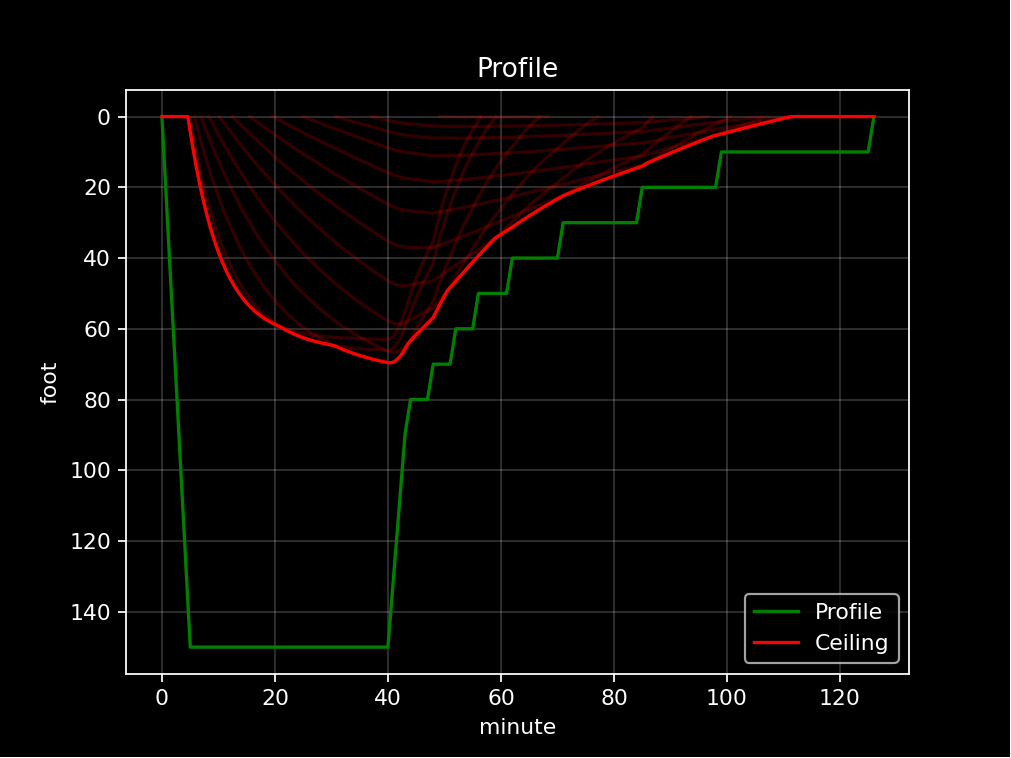

Text(0.5, 1.0, 'Profile')

In [3]:
# Depth
plt.figure()
plt.plot(result.time, result.depth, "g", label="Profile")
idxs = np.nonzero(result.deco.ceiling >= 0)[0]
plt.plot(result.time[idxs], result.deco.ceiling[idxs], "r", label="Ceiling")
plt.legend(loc="best")
for i in range(result.deco.ceilings.shape[0]):
    idxs = np.nonzero(result.deco.ceilings[i, :] > 0)[0]
    if len(idxs):
        plt.plot(result.time[idxs], result.deco.ceilings[i, idxs], "r", alpha=0.2)
plt.gca().invert_yaxis()
plt.grid(alpha=0.2)
plt.title("Profile")

<IPython.core.display.Javascript object>


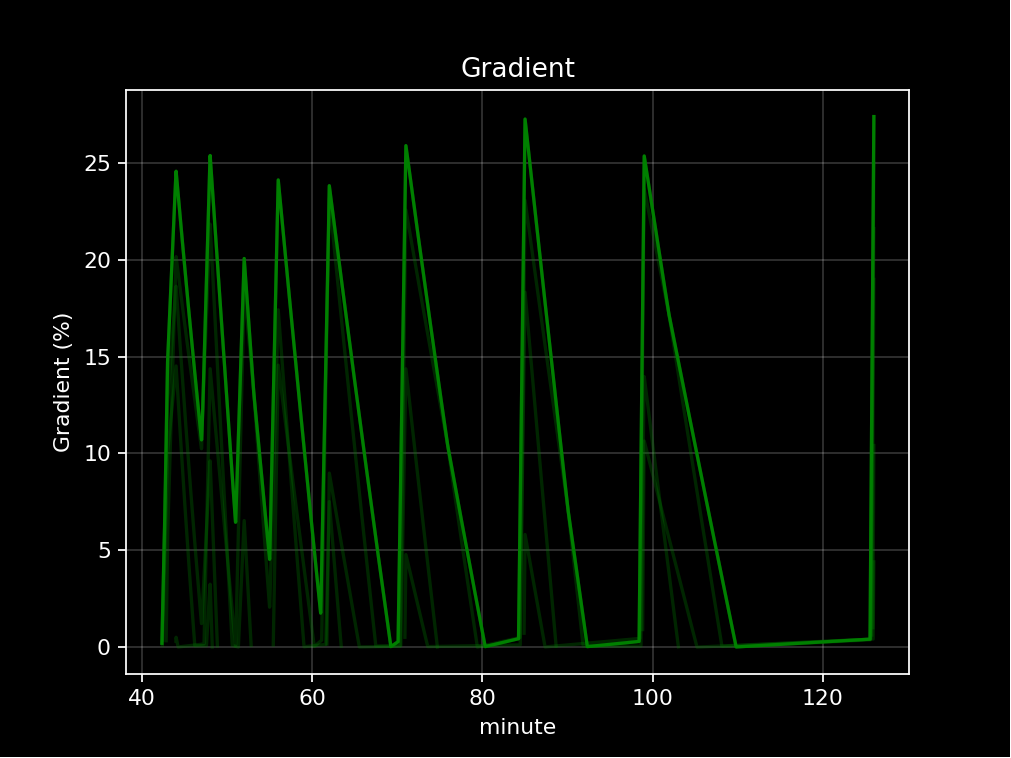

Text(0.5, 1.0, 'Gradient')

In [4]:
import numpy as np

plt.figure()

idxs = np.nonzero(result.deco.gradient >= 0)[0]
plt.plot(result.time[idxs], result.deco.gradient[idxs] * 100, "g")
for i in range(result.deco.gradients.shape[0]):
    idxs = np.nonzero(result.deco.gradients[i, :] > 0)[0]
    if len(idxs):
        plt.plot(result.time[idxs], result.deco.gradients[i, idxs] * 100, "g", alpha=0.3)
plt.grid(alpha=0.2)
plt.ylabel("Gradient (%)")
plt.title("Gradient")

<IPython.core.display.Javascript object>


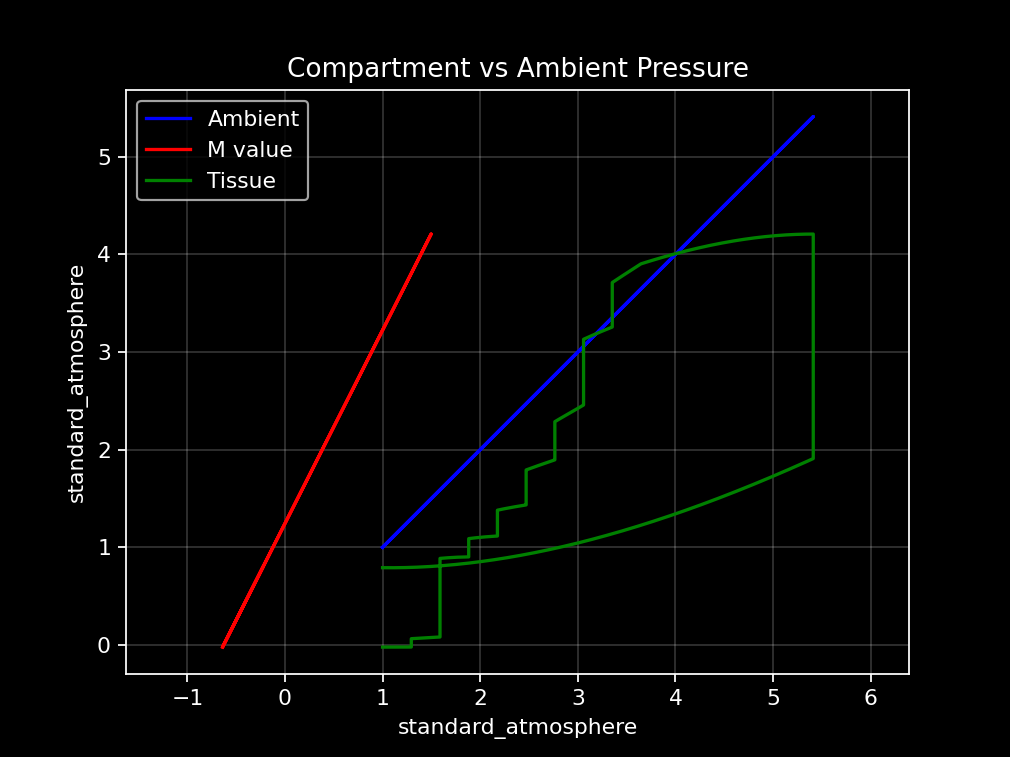

<IPython.core.display.Javascript object>


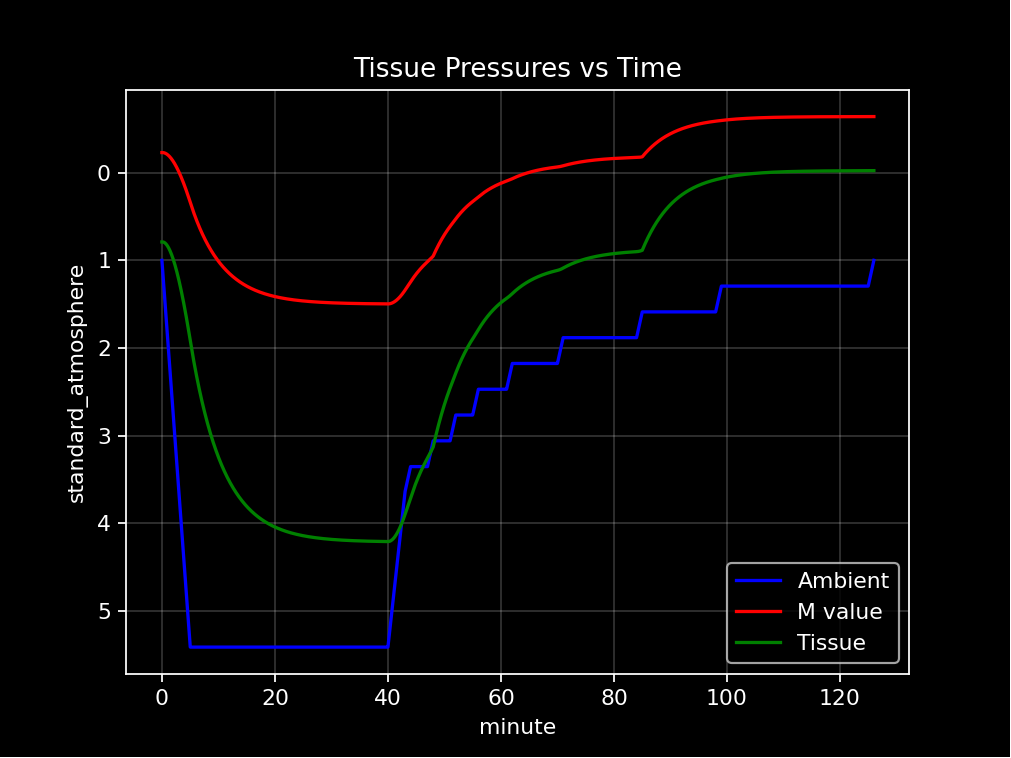

Text(0.5, 1.0, 'Tissue Pressures vs Time')

In [5]:
# single compartment analysis

COMPARTMENT = 0

# ambient_pressure = [cenote.pressure_from_depth(d, plan.water()) for d in result.depth]
plt.figure()
plt.plot(result.ambient_pressure, result.ambient_pressure, "b", label="Ambient")
plt.plot(result.deco.M0s[COMPARTMENT, :], result.deco.tissue_pressures[COMPARTMENT, :], "r", label="M value")
plt.plot(result.ambient_pressure, result.deco.tissue_pressures[COMPARTMENT, :], "g", label="Tissue")
plt.legend(loc="best")
plt.axis("equal")
plt.grid(alpha=0.2)
plt.title("Compartment vs Ambient Pressure")

plt.figure()
plt.plot(result.time, result.ambient_pressure, "b", label="Ambient")
plt.plot(result.time, result.deco.M0s[COMPARTMENT, :], "r", label="M value")
plt.plot(result.time, result.deco.tissue_pressures[COMPARTMENT, :], "g", label="Tissue")
plt.legend(loc="best")
plt.grid(alpha=0.2)
plt.gca().invert_yaxis()
plt.title("Tissue Pressures vs Time")

<IPython.core.display.Javascript object>


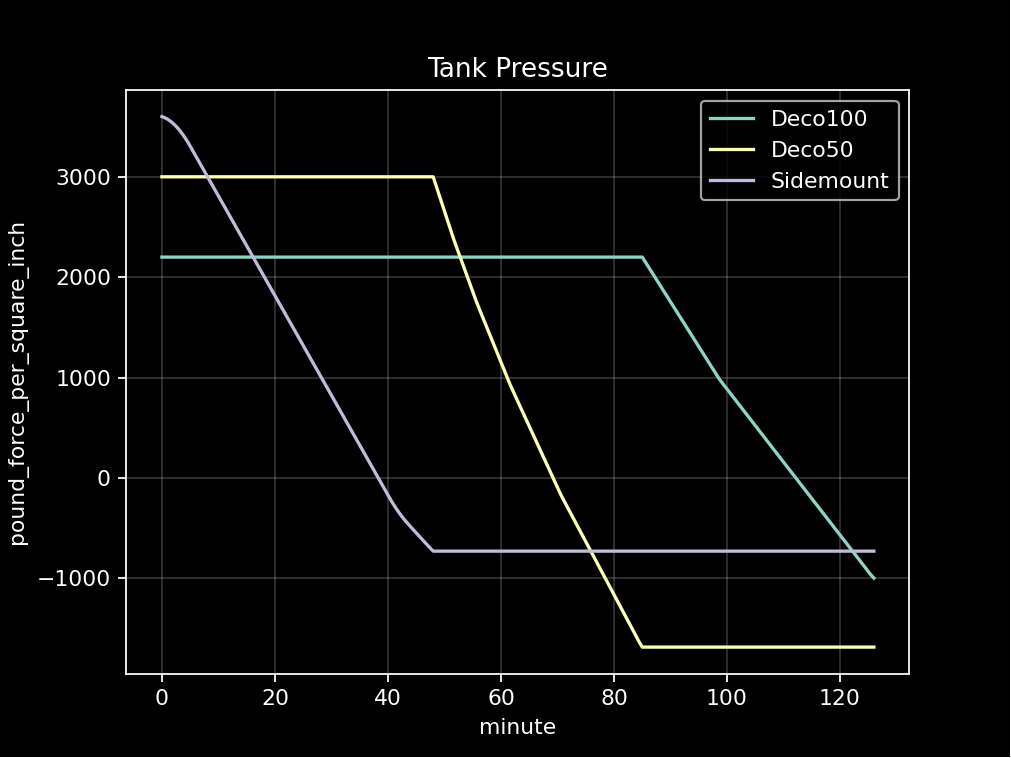

In [6]:
# Pressure
plt.figure()
for tank in result.tank_pressure:
    plt.plot(result.time, result.tank_pressure[tank], label=tank)
plt.grid(alpha=0.2)
plt.title("Tank Pressure")
plt.legend(loc="best")